<h1>Case Study 5 - Predicting Income Classes</h1>
BY: MHD.SHADI HASAN

<h2>Problem Background</h2>

Apply machine learning on the so-called Adult dataset (also known as the Census Income dataset).

The dataset, stores demographic information about ~50,000 people. The final feature is the income level, with values "<=50K" or ">50K" indicating that this person earns less than $50,000, or more, respectively.

**Requirments**

It is required to predict the income class using the other features.

**Data**

|Attribute|Values|
|---------|------|
|age|Continuous|
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|fnlwgt| Continuous|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|education-num|Continuous|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|sex| Female, Male|
|capital-gain| Continuous|
|capital-loss| Continuous|
|hours-per-week| Continuous|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|
|income| <=50K, >50K|

<h2>Data Preparation</h2>

In [1]:
#import needed libraries
import pandas as pd
import numpy as np

In [2]:
#read the data to a pandas dataframe and replace '?' with 'NaN'
df = pd.read_csv('adult.csv', header=None, sep=',\s', na_values=["?"])

#name the headers
headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
           'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df.columns = headers

df.head()

C:\Users\GTS\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#show the dataframe's size and data types
print('Dataframe size is:', df.shape)
print('')
print('Available data types:')
print(df.dtypes)

Dataframe size is: (32561, 15)

Available data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


<h3>Missing Values</h3>

In [4]:
#define dataframe with booliean values 
#False ==> not null
#True ==> is null
missing_data = df.isnull()
missing_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#show how many null values for each column
for column in missing_data:
    print(column)
    print (missing_data[column].value_counts())
    print("")

age
False    32561
Name: age, dtype: int64

workclass
False    30725
True      1836
Name: workclass, dtype: int64

fnlwgt
False    32561
Name: fnlwgt, dtype: int64

education
False    32561
Name: education, dtype: int64

education-num
False    32561
Name: education-num, dtype: int64

marital-status
False    32561
Name: marital-status, dtype: int64

occupation
False    30718
True      1843
Name: occupation, dtype: int64

relationship
False    32561
Name: relationship, dtype: int64

race
False    32561
Name: race, dtype: int64

sex
False    32561
Name: sex, dtype: int64

capital-gain
False    32561
Name: capital-gain, dtype: int64

capital-loss
False    32561
Name: capital-loss, dtype: int64

hours-per-week
False    32561
Name: hours-per-week, dtype: int64

native-country
False    31978
True       583
Name: native-country, dtype: int64

income
False    32561
Name: income, dtype: int64



We can see that the columns having missing values are:

* workclass (1836 null values)
* occupation (1843 null values)
* native-country (583 null values)

By inspecting the dataframe, it was apparent that the null values in 'workclass' and 'occupation' mostly occur in the same rows. 

Since these records make only about 6% of the total records, and it is expected that they have significant correlation with the target variable 'income', dropping them would insure higher accuracy in the model.

In [6]:
# drop whole row where 'occupation' is null
df.dropna(subset=["occupation"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
#check again for null values
missing_data_2 = df.isnull()

for column in missing_data_2:
    print(column)
    print (missing_data_2[column].value_counts())
    print("")

age
False    30718
Name: age, dtype: int64

workclass
False    30718
Name: workclass, dtype: int64

fnlwgt
False    30718
Name: fnlwgt, dtype: int64

education
False    30718
Name: education, dtype: int64

education-num
False    30718
Name: education-num, dtype: int64

marital-status
False    30718
Name: marital-status, dtype: int64

occupation
False    30718
Name: occupation, dtype: int64

relationship
False    30718
Name: relationship, dtype: int64

race
False    30718
Name: race, dtype: int64

sex
False    30718
Name: sex, dtype: int64

capital-gain
False    30718
Name: capital-gain, dtype: int64

capital-loss
False    30718
Name: capital-loss, dtype: int64

hours-per-week
False    30718
Name: hours-per-week, dtype: int64

native-country
False    30162
True       556
Name: native-country, dtype: int64

income
False    30718
Name: income, dtype: int64



All null values have been eliminated from 'workclass' and 'occupation'. However, we still need to deal with missing values in 'native-country'.

In [8]:
#calculate frequency for each country
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

The 'United-States' is by far the most recurrent value, so we will use it to fill the missing values in that column.

In [9]:
#replace missing values in 'native-country' by 'United-States'
df["native-country"].replace(np.nan, "United-States", inplace=True)

<h3>Encoding Categorical Features</h3>

For training the Machine Learning Model, the input features must be of a numerical type (i.e. int or float), so we will locate 'object' data types in our feature set and replace them with numerical values.

In [10]:
#inspect available data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
#use dummies to encode 'object' data
dummy_variable_workclass = pd.get_dummies(df["workclass"])
dummy_variable_maritalstatus = pd.get_dummies(df["marital-status"])
dummy_variable_occupation = pd.get_dummies(df["occupation"])
dummy_variable_relationship = pd.get_dummies(df["relationship"])
dummy_variable_race = pd.get_dummies(df["race"])
dummy_variable_sex = pd.get_dummies(df["sex"])
dummy_variable_nativecountry = pd.get_dummies(df["native-country"])

In [12]:
#add new columns to the dataset
df = pd.concat([df, dummy_variable_workclass, dummy_variable_maritalstatus, dummy_variable_occupation,
               dummy_variable_relationship, dummy_variable_race, dummy_variable_sex, dummy_variable_nativecountry], axis=1)

#remove old columns
df.drop(['workclass','marital-status','occupation','relationship','race','sex',
         'native-country','education'], axis = 1, inplace=True)

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#move the target variable to be the last column
cols = list(df.columns.values)
cols.pop(cols.index('income'))
df = df[cols+['income']]
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K


<h2>Classification</h2>

It is required to predict the income class. Therefore, we will build a KNN classification model. 

**KNN** is a simple method that inspects the class of a 'K' number of nearest neighbors and assigns the class with the highest frequency to the predicted data point. It is based on the assumption that similar individuals have close incomes.

In [14]:
#calculate frequency of each class
df['income'].value_counts()

<=50K    23068
>50K      7650
Name: income, dtype: int64

In [15]:
#define input features and target variable
X = df[cols].values
y = df['income'].values

In [16]:
#import library for data normalization
from sklearn import preprocessing
#normalize the input data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [17]:
#import library needed to split the data into train/test sets
from sklearn.model_selection import train_test_split

#split the data into train/test sets; 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
#show the size of each set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21502, 88) (21502,)
Test set: (9216, 88) (9216,)


In [18]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import metrics
from sklearn import metrics
#import library to calculate progress bar in loops
from tqdm import tqdm

In [19]:
#test the KNN model for different values of K and calculate accuracy
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in tqdm(range(1,Ks)):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

100%|██████████| 99/99 [55:58<00:00, 35.44s/it]


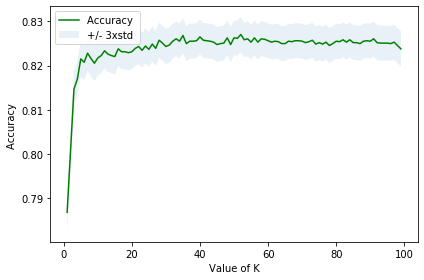

In [20]:
#import library to plot the accuracy curve
import matplotlib.pyplot as plt
%matplotlib inline

#plot the accuracy curve
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Value of K')
plt.tight_layout()
plt.show()

In [21]:
#best accuracy achieved was...
print( "The best accuracy achieved was ", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy achieved was  0.8270399305555556 with k = 52


In [22]:
#train the KNN model with K = 52
k = 52

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=52, p=2,
                     weights='uniform')

**Our Classification Model is ready and has an accuracy of 83%**